<div style= "font-size: 38px; color: DarkRed; text-align: center; font-weight: bold;border-bottom:2px dashed green; line-height: 1cm; "> Prédiction du prix d'un bien logement à l'aide de modèles de Machine Learning.</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/e/ec/LOGO-ENSAE.png" width=80, height=40/>
    
<div style="text-align: center;font-size: 16px;">Supervisé par M. Guillaume BIED</div>

<div style="font-size: 18px;font-family: 'Times New Roman', Times, serif;color: DarkRed;text-align: center;">ALAIS Claire--ALI ZATCHI Afzal--BANCE Youssouf</div>
    
<div style="font-size: 18px;font-family: 'Times New Roman', Times, serif;color: DarkBlue;text-align: center;border-bottom:2px dashed green; line-height: 1cm;"> Octobre - Decembre 2020</div>


## Introduction

Lors de l'achat d'un bien immobilier, le client dépend de l'estimation d'un agent immobilier pour sa négociation. Le savoir-faire de l'agent est pour l'instant essentiel, mais peut être sensible à des biais humains comme simplement l'humeur de l'agent ou ses qualités de vendeur. Un particulier désirant acheter ou vendre pourrait alors souhaiter une estimation neutre de leur bien pour comparer les offres de plusieurs agences ou superviser la transaction lui-même. Est-ce qu'un modèle prenant en compte un maximum de données objectives pourrait proposer des estimations convaincantes d'un bien immobilier ?
Le but de ce travail est d'estimer le prix d'un logement en fonction de ses caractéristiques intrinsèques (nombre de pièces, surface, exposition...), de sa localisation (commune, département,...) et de son environnement (proximité des transports). Pour cela nous utilisons les informations des annonces de vente de maisons ou d'appartements en Ile-de-France issues du site [bienici.com]( https://www.bienici.com ).    
La première partie concerne l'extraction des données, leur nettoyage et mise en forme. La deuxième partie donne des statistiques descriptives sur les différents paramètres. Dans la troisième partie plusieurs modèles sont comparés pour prédire le prix de vente.

In [26]:
import pandas as pd
import numpy as np
import time
import substring
import sklearn
import seaborn as sns
import scipy as stats
import os
import geopandas as gpd
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

## I. Extraction des données et prétraitement

Nous tirons les informations des annonces immobilères publiées sur le site bienici.fr en nous restreignant à l'Ile-de-France.

### 1. Collecte des données: webscrapping dynamique

### 2. Préparation de la base de données

Pour la suite nous utilisons par défaut la base telle que collectée le 9 décembre 2020, disponible dans le dossier sous le nom 'export_dataframe.csv'.

#### Fusion des données

In [3]:
####
os.chdir("C:/Users/clair/Documents/Projet python 2020")

In [4]:
os.listdir('base_for_preprocessing')

['doc_APPART_YV78_de_0_749.npy',
 'ES91_maison_0_604.csv',
 'ES91_maison_605_.csv',
 'HS92_maison.csv',
 'HS92_maison.xlsx',
 'HS92_maison_idPhoto.csv',
 'PA75_maison.csv',
 'PA75_maison_idPhoto.csv',
 'YV78_maison_749_1274.csv']

In [5]:
ES91_maison_0_604=pd.read_csv("base_for_preprocessing/ES91_maison_0_604.csv") # ok
ES91_maison_605_=pd.read_csv("base_for_preprocessing/ES91_maison_605_.csv") # ok
HS92_maison=pd.read_csv("base_for_preprocessing/HS92_maison.csv") # ok 
PA75_maison=pd.read_csv("base_for_preprocessing/PA75_maison.csv") # ok
YV78_maison_749_1274=pd.read_csv("base_for_preprocessing/YV78_maison_749_1274.csv") # ok

In [6]:
donnees_Ile_De_France = pd.concat([ES91_maison_0_604,
                                   ES91_maison_605_,
                                   HS92_maison,
                                   PA75_maison,
                                   YV78_maison_749_1274],ignore_index=True)

In [7]:
#donnees_Ile_De_France.drop(donnees_Ile_De_France.index[[2698,2875,2919,3115,3116,3127]],inplace=True)
data=donnees_Ile_De_France

In [8]:
data

,Unnamed: 0,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,Terrasse,Garage,Prix_sur,Reference,Date_publication,Date_modification,Titre_description,Description
0,0,ES91_0,Boussy-Saint-Antoine 91800,"Achat maison 4 pièces 128 m², Boussy-Saint-Ant...",414 500 €,128 m²,4 pièces,3 chambres,2 places de parking,Jardin,NaN,NaN,NaN,3 238 €/m²,Réf. de l’annonce : 098906E1QEZB,Publiée le 12 oct. 2020,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 4 pièce...,"Maison Boussy Saint Antoine 4 pièce(s) 128 m2,..."
1,1,ES91_1,Chilly-Mazarin 91380 (Gravigny),"Achat maison 4 pièces 82 m², Chilly-Mazarin - ...",357 000 €,"81,78 m²",4 pièces,3 chambres,3 places de parking,Jardin,NaN,1 terrasse,NaN,4 365 €/m²,Réf. de l’annonce : 3310,Publiée il y a plus de 2 mois,Modifiée le 12 oct. 2020,Descriptif de cette maison à vendre de 4 pièce...,Vente d'une maison F4 à CHILLY MAZARIN. MAISON...
2,2,ES91_2,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 6 pièces 163 m², Sainte-Geneviève...",450 000 €,163 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,NaN,NaN,2 761 €/m²,Réf. de l’annonce : 09891902QHRQ,Publiée il y a plus de 2 mois,Modifiée le 27 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Maison STE GENEVIEVE DES BOIS 6 pièce(s) 160 m...
3,3,ES91_3,Longjumeau 91160 (Gubanski - Sud),"Achat maison 7 pièces 154 m², Longjumeau - 467...",467 500 €,154 m²,7 pièces,4 chambres,8 places de parking,Jardin,NaN,NaN,NaN,3 036 €/m²,Réf. de l’annonce : 098023E1LUDE,Publiée il y a plus de 2 mois,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Longjumeau 7 pièce(s) 154 m2 / 2 double...
4,4,ES91_4,Morsang-sur-Orge 91390 (Langevin),"Achat maison 7 pièces 155 m², Morsang-sur-Orge...",465 000 €,155 m²,7 pièces,5 chambres,6 places de parking,Jardin,NaN,NaN,NaN,3 000 €/m²,Réf. de l’annonce : 098061E1LN0N,Publiée il y a plus de 2 mois,Modifiée le 1 déc. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Morsang Sur Orge. EXCLUSIVITÉ - MORSANG...
5,5,ES91_5,Champcueil 91750,"Achat maison 6 pièces 177 m², Champcueil - 536...",536 000 €,177 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,NaN,NaN,3 028 €/m²,Réf. de l’annonce : 098064E1M62I,Publiée il y a plus de 2 mois,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Maison Coup de coeur ! Très beaux volumes et s...
6,6,ES91_6,Bures-sur-Yvette 91440,"Achat maison 9 pièces 140 m², Bures-sur-Yvette...",525 300 €,140 m²,9 pièces,7 chambres,2 places de parking,Jardin,NaN,NaN,NaN,3 643 €/m²,Réf. de l’annonce : 652,Publiée il y a plus de 2 mois,Modifiée le 9 déc. 2020,Descriptif de cette maison à vendre de 9 pièce...,A VENDRE - MAISON 9 PIÈCES 140 M2 - BURES SUR ...
7,7,ES91_7,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 7 pièces 146 m², Sainte-Geneviève...",477 000 €,146 m²,7 pièces,4 chambres,4 places de parking,Jardin,NaN,NaN,NaN,3 267 €/m²,Réf. de l’annonce : 098019E1LWTH,Publiée il y a plus de 2 mois,Modifiée le 27 nov. 2020,Descriptif de cette maison à vendre de 7 pièce...,Maison Sainte Geneviève des bois. Venez découv...
8,8,ES91_8,Athis-Mons 91200 (Mons - Plaine Basse),"Achat maison 8 pièces 300 m², Athis-Mons - 655...",655 000 €,300 m²,8 pièces,5 chambres,5 places de parking,Jardin,NaN,NaN,NaN,2 183 €/m²,Réf. de l’annonce : 098055E15BVX,Publiée il y a plus de 2 mois,Modifiée le 6 nov. 2020,Descriptif de cette maison à vendre de 8 pièce...,Demeure Athis Mons 8 pièce(s) 300 m2 jardin pa...
9,9,ES91_9,Étampes 91150 (Saint-Pierre),"Achat maison 6 pièces 198 m², Étampes - 424 000 €",424 000 €,198 m²,6 pièces,4 chambres,2 places de parking,Jardin,NaN,NaN,Garage,2 141 €/m²,Réf. de l’annonce : 2460,Publiée il y a plus de 2 mois,Modifiée le 12 nov. 2020,Descriptif de cette maison à vendre de 6 pièce...,Votre agence ERA IMMOBILIER Etampes vous propo...


#### Fonction de Nettoyage

In [14]:
def Clean(data):
    # Copie de la data
    donnee=data
    
    donnee.drop(columns='Unnamed: 0',inplace=True)
    # Prix
    donnee["PrixR"]=donnee.Prix.str.replace("€","").str.replace(" ","")
    donnee["PrixR"]=donnee['PrixR'].astype(float)

    ## Surface
    donnee['SurfaceR']=donnee.Surface.str.replace("m²","").str.replace(",",".")
    donnee['SurfaceR']=donnee.SurfaceR.astype(float)

    ## Pieces
    donnee['Nb_PiecesR']=donnee.Nb_piece.str.replace("pièce","").str.replace("s","").str.replace(" ","")
    donnee["Nb_PiecesR"]=donnee.Nb_PiecesR.astype(float)

    ### Chambres
    donnee['Nb_ChambresR']=donnee.Nb_chambre.str.replace("chambre","").str.replace("s","").str.replace(" ","")
    donnee["Nb_ChambresR"]=donnee.Nb_ChambresR.astype(float)

    ### Adresse  et  Zone: Emplacement( Ville, Commune, Je ne sais pas trop)

    ## Exemple Asnières-sur-Seine 92600 (Coubertin)
    #   DepartR= 92600    ZoneR = "Asnières-sur-Seine" 
    #   EmplacementR = "(Coubertin)"

    # Departement
    dep=[''.join([i for i in j if i.isdigit()][-5:]) for j in donnee.Addresse]
    dep=[str(i) for i in dep]
    donnee["postal_code"]=dep
    
    depl=[''.join([i for i in j if i.isdigit()]) for j in data.Addresse]
    depl=[i[:2] for i in depl]
    donnee["Dep"]=depl

    # ZoneR
    secteur=[''.join([i for i in j if not i.isdigit()]) for j in donnee.Addresse]
    donnee["ZoneR"]=secteur


    ##  Emplacement exact( Précisé entre Parenthèses)
    donnee["EmplacementR"]=[substring.substringByChar(i, startChar="(", endChar=")").replace('(','').replace(')','') if i.find('(')>=0 else i for i in donnee.ZoneR]

    ### Parking
    park=donnee.Parking.fillna('')
    park.replace('',np.nan)
    park=[''.join([i for i in j if i.isdigit()]) for j in park]
    park=[np.nan if i=='' else float(i) for i in park]
    donnee["ParkingR"]=park

    ## Les Nan pour les parking représentent les maisons sans parking( je pense)
    donnee['ParkingR']=donnee['ParkingR'].fillna(0)

    ## Jardin 
    donnee['JardinR']=~donnee.Jardin.isna()

    ### Ascenseur : Inutile visuellement Ne contient que les Na/ En meme tps
    # Les maisons n'ont pas d'ascenseur
    return donnee

In [15]:
data=Clean(data)

In [16]:
data

,id_hourse,Addresse,Titre,Prix,Surface,Nb_piece,Nb_chambre,Parking,Jardin,Ascenseur,...,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,postal_code,Dep,ZoneR,EmplacementR,ParkingR,JardinR
0,ES91_0,Boussy-Saint-Antoine 91800,"Achat maison 4 pièces 128 m², Boussy-Saint-Ant...",414 500 €,128 m²,4 pièces,3 chambres,2 places de parking,Jardin,NaN,...,414500.0,128.00,4.0,3.0,91800,91,Boussy-Saint-Antoine,Boussy-Saint-Antoine,2.0,True
1,ES91_1,Chilly-Mazarin 91380 (Gravigny),"Achat maison 4 pièces 82 m², Chilly-Mazarin - ...",357 000 €,"81,78 m²",4 pièces,3 chambres,3 places de parking,Jardin,NaN,...,357000.0,81.78,4.0,3.0,91380,91,Chilly-Mazarin (Gravigny),Gravigny,3.0,True
2,ES91_2,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 6 pièces 163 m², Sainte-Geneviève...",450 000 €,163 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,...,450000.0,163.00,6.0,4.0,91700,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard,3.0,True
3,ES91_3,Longjumeau 91160 (Gubanski - Sud),"Achat maison 7 pièces 154 m², Longjumeau - 467...",467 500 €,154 m²,7 pièces,4 chambres,8 places de parking,Jardin,NaN,...,467500.0,154.00,7.0,4.0,91160,91,Longjumeau (Gubanski - Sud),Gubanski - Sud,8.0,True
4,ES91_4,Morsang-sur-Orge 91390 (Langevin),"Achat maison 7 pièces 155 m², Morsang-sur-Orge...",465 000 €,155 m²,7 pièces,5 chambres,6 places de parking,Jardin,NaN,...,465000.0,155.00,7.0,5.0,91390,91,Morsang-sur-Orge (Langevin),Langevin,6.0,True
5,ES91_5,Champcueil 91750,"Achat maison 6 pièces 177 m², Champcueil - 536...",536 000 €,177 m²,6 pièces,4 chambres,3 places de parking,Jardin,NaN,...,536000.0,177.00,6.0,4.0,91750,91,Champcueil,Champcueil,3.0,True
6,ES91_6,Bures-sur-Yvette 91440,"Achat maison 9 pièces 140 m², Bures-sur-Yvette...",525 300 €,140 m²,9 pièces,7 chambres,2 places de parking,Jardin,NaN,...,525300.0,140.00,9.0,7.0,91440,91,Bures-sur-Yvette,Bures-sur-Yvette,2.0,True
7,ES91_7,Sainte-Geneviève-des-Bois 91700 (Georges Pitard),"Achat maison 7 pièces 146 m², Sainte-Geneviève...",477 000 €,146 m²,7 pièces,4 chambres,4 places de parking,Jardin,NaN,...,477000.0,146.00,7.0,4.0,91700,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard,4.0,True
8,ES91_8,Athis-Mons 91200 (Mons - Plaine Basse),"Achat maison 8 pièces 300 m², Athis-Mons - 655...",655 000 €,300 m²,8 pièces,5 chambres,5 places de parking,Jardin,NaN,...,655000.0,300.00,8.0,5.0,91200,91,Athis-Mons (Mons - Plaine Basse),Mons - Plaine Basse,5.0,True
9,ES91_9,Étampes 91150 (Saint-Pierre),"Achat maison 6 pièces 198 m², Étampes - 424 000 €",424 000 €,198 m²,6 pièces,4 chambres,2 places de parking,Jardin,NaN,...,424000.0,198.00,6.0,4.0,91150,91,Étampes (Saint-Pierre),Saint-Pierre,2.0,True


## II. Description des caractéristiques des logements

### 1. Description univariée des caractéristiques

In [17]:
dataSubset=data[['id_hourse','PrixR', 'SurfaceR', 'Nb_PiecesR',
       'Nb_ChambresR', 'ParkingR', 'JardinR', 'Dep', 'ZoneR',
       'EmplacementR']]

In [18]:
dataSubset

,id_hourse,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR,JardinR,Dep,ZoneR,EmplacementR
0,ES91_0,414500.0,128.00,4.0,3.0,2.0,True,91,Boussy-Saint-Antoine,Boussy-Saint-Antoine
1,ES91_1,357000.0,81.78,4.0,3.0,3.0,True,91,Chilly-Mazarin (Gravigny),Gravigny
2,ES91_2,450000.0,163.00,6.0,4.0,3.0,True,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard
3,ES91_3,467500.0,154.00,7.0,4.0,8.0,True,91,Longjumeau (Gubanski - Sud),Gubanski - Sud
4,ES91_4,465000.0,155.00,7.0,5.0,6.0,True,91,Morsang-sur-Orge (Langevin),Langevin
5,ES91_5,536000.0,177.00,6.0,4.0,3.0,True,91,Champcueil,Champcueil
6,ES91_6,525300.0,140.00,9.0,7.0,2.0,True,91,Bures-sur-Yvette,Bures-sur-Yvette
7,ES91_7,477000.0,146.00,7.0,4.0,4.0,True,91,Sainte-Geneviève-des-Bois (Georges Pitard),Georges Pitard
8,ES91_8,655000.0,300.00,8.0,5.0,5.0,True,91,Athis-Mons (Mons - Plaine Basse),Mons - Plaine Basse
9,ES91_9,424000.0,198.00,6.0,4.0,2.0,True,91,Étampes (Saint-Pierre),Saint-Pierre


In [19]:
dataSubset['PrixR'].describe()

count    3.163000e+03
mean     6.745278e+05
std      1.428116e+06
min      3.631500e+04
25%      3.200000e+05
50%      4.400000e+05
75%      6.800000e+05
max      6.000000e+07
Name: PrixR, dtype: float64

In [28]:
### 
dataSubset.corr()

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR,JardinR
PrixR,1.000000,0.540392,0.427750,0.354132,0.008135,-0.077554
SurfaceR,0.540392,1.000000,0.579588,0.684230,0.145032,0.063997
Nb_PiecesR,0.427750,0.579588,1.000000,0.630537,0.092185,0.079363
Nb_ChambresR,0.354132,0.684230,0.630537,1.000000,0.106755,0.106745
ParkingR,0.008135,0.145032,0.092185,0.106755,1.000000,0.121217
JardinR,-0.077554,0.063997,0.079363,0.106745,0.121217,1.000000


#### A propos du prix : 
la distribution est très ramassée vers les plus bas prix, avec néanmoins quelques maisons avec des prix très élevés (un facteur 2000 entre le minimum et le maximum). On décrira plus facilement le logarithme du prix, dont la distribution a une allure "plus gaussienne", même s'il y a toujours une asymétrie.

In [33]:
dataSubset['PrixR'].describe()

count    3.163000e+03
mean     6.745278e+05
std      1.428116e+06
min      3.631500e+04
25%      3.200000e+05
50%      4.400000e+05
75%      6.800000e+05
max      6.000000e+07
Name: PrixR, dtype: float64

Text(0,0.5,'Fréquence')

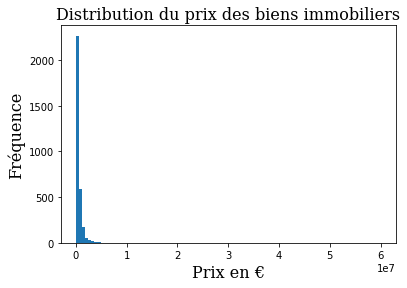

In [27]:
dataSubset.PrixR.plot.hist(bins=100)
plt.title('Distribution du prix des biens immobiliers', fontdict=font)
plt.xlabel('Prix en €', fontdict=font)
plt.ylabel('Fréquence', fontdict=font)

Text(0,0.5,'Fréquence')

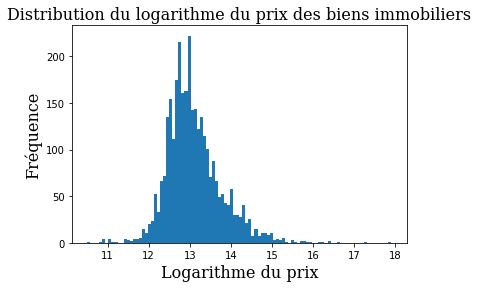

In [30]:
dataSubset.PrixR.apply(np.log).plot.hist(bins=100)
plt.title('Distribution du logarithme du prix des biens immobiliers', fontdict=font)
plt.xlabel('Logarithme du prix', fontdict=font)
plt.ylabel('Fréquence', fontdict=font)

#### A propos de la surface: 
le problème est un peu le même qu'avec le prix, avec néanmoins une moins grande variabilité des valeurs

In [ ]:
dataSubset['SurfaceR'].describe()

Text(0,0.5,'Fréquence')

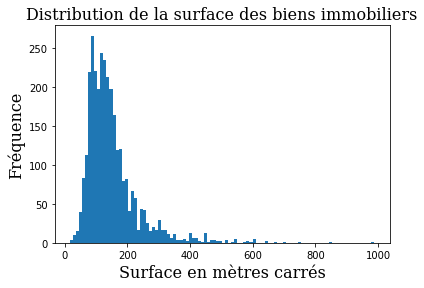

In [34]:
dataSubset['SurfaceR'].plot.hist( bins=100)
plt.title('Distribution de la surface des biens immobiliers', fontdict=font)
plt.xlabel('Surface en mètres carrés', fontdict=font)
plt.ylabel('Fréquence', fontdict=font)

Text(0,0.5,'Fréquence')

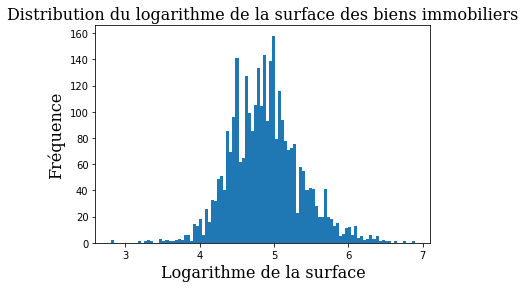

In [35]:
dataSubset['SurfaceR'].apply(np.log).plot.hist(bins=100)
plt.title('Distribution du logarithme de la surface des biens immobiliers', fontdict=font)
plt.xlabel('Logarithme de la surface', fontdict=font)
plt.ylabel('Fréquence', fontdict=font)

#### A propos du nombre de pièces et de chambres : 
la très grande majorité des logements ont moins de 7 pièces dont 5 chambres (huitièmes déciles de chaque distribution), mais cela va jusqu'à 166 pièces et 32 chambres ! Les plus grandes demeures sont tout de même très peu nombreuses par rapport à la taille de l'échantillon.

In [46]:
dataSubset['Nb_ChambresR'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    3137.000000
mean        3.876953
std         1.453850
min         1.000000
10%         2.000000
20%         3.000000
30%         3.000000
40%         3.000000
50%         4.000000
60%         4.000000
70%         4.000000
80%         5.000000
90%         5.000000
max        32.000000
Name: Nb_ChambresR, dtype: float64

In [47]:
dataSubset['Nb_PiecesR'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    3157.000000
mean        6.128920
std         3.861781
min         1.000000
10%         4.000000
20%         4.000000
30%         5.000000
40%         5.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         9.000000
max       166.000000
Name: Nb_PiecesR, dtype: float64

Text(0,0.5,'Fréquence')

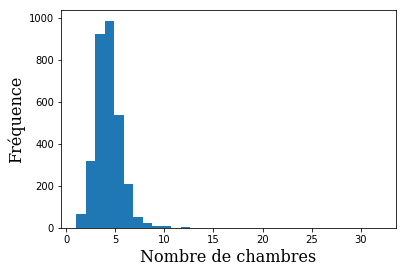

In [49]:
dataSubset['Nb_ChambresR'].plot.hist(bins=32)
plt.xlabel('Nombre de chambres', fontdict=font)
plt.ylabel('Fréquence', fontdict=font)

Text(0,0.5,'Fréquence')

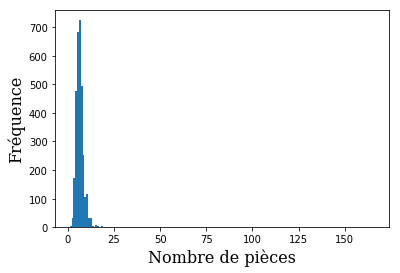

In [50]:
dataSubset['Nb_PiecesR'].plot.hist(bins=166)
plt.xlabel('Nombre de pièces', fontdict=font)
plt.ylabel('Fréquence', fontdict=font)

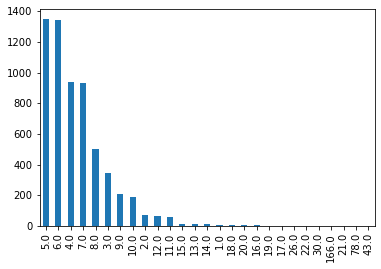

In [35]:
#on le garde ça ? comment vous le lisez ? Soit on commente et on ajoute une légende, soit on enlève.

dataSubset['Nb_PiecesR'].value_counts().plot.bar()

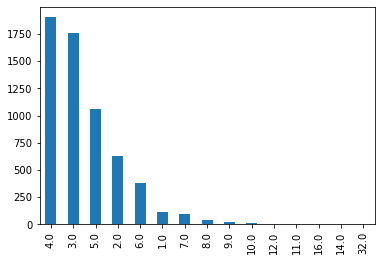

In [36]:
dataSubset['Nb_ChambresR'].value_counts().plot.bar()

#### A propos des places de parking et de la présence d'un jardin :

In [45]:
dataSubset['ParkingR'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9])

count    3218.000000
mean        1.153822
std         2.597365
min         0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         2.000000
80%         2.000000
90%         3.000000
max        99.000000
Name: ParkingR, dtype: float64

Plus de la moitié des annonces correspondent à des biens qui n'ont pas de place de parking associée, parmi les logements restants il est plus courant d'avoir peu de places (90% en ont 3 ou moins), mais là encore quelques biens en ont beaucoup plus (99 au maximum).

In [48]:
dataSubset['JardinR'].describe()

count     3218
unique       2
top       True
freq      2707
Name: JardinR, dtype: object

84% des biens mis en vente ont un jardin.

### 2. Corrélations

In [37]:
import seaborn as sns
import scipy as stats

In [38]:
Quanti=dataSubset[['PrixR', 'SurfaceR', 'Nb_PiecesR','Nb_ChambresR','ParkingR']]
Quanti

,PrixR,SurfaceR,Nb_PiecesR,Nb_ChambresR,ParkingR
0,414500.0,128.00,4.0,3.0,2.0
1,357000.0,81.78,4.0,3.0,3.0
2,450000.0,163.00,6.0,4.0,3.0
3,467500.0,154.00,7.0,4.0,8.0
4,465000.0,155.00,7.0,5.0,6.0
...,...,...,...,...,...
6173,625000.0,245.00,7.0,4.0,2.0
6174,280000.0,145.00,6.0,4.0,2.0
6175,566000.0,160.00,5.0,3.0,2.0
6176,484000.0,145.00,7.0,5.0,2.0


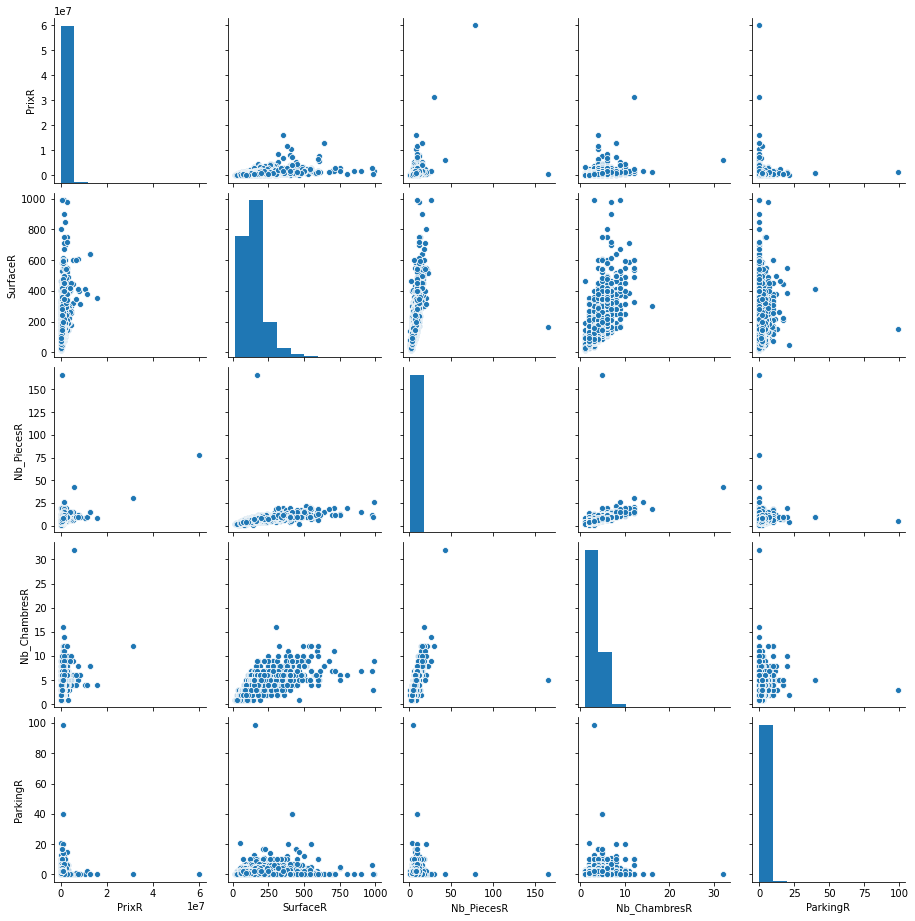

In [39]:
sns.pairplot(Quanti)

### 3.Effet de la localisation

Pour chaque annonce immobilière, l'emplacement est donné par le nom de la commune, parfois une indication sur le quartier à l'intérieur de la commune, et le code postal : c'est cette dernière information que nous utilisons. La base +code-insee-code-postal.json+ donne les coordonnées géographiques associées à chaque code postal, ce qui nous permet d'afficher le prix moyen du mètre carré et la surface moyenne des logements par code postal, et pour information le nombre d'annonces concernées dans chaque zone. En général il y a peu d'annonces par zone, nous regardons alors aussi ces données par département. Un code postal correspond approximativement à une commune (mais distingue les arrondissements de Paris par exemple). Pour les contours des départements nous utilisons la base +contours-des-departements.geojson+.

In [21]:
codegeo = gpd.read_file('code-insee-code-postal.geojson')
data_subset=donnee[['id_hourse','PrixR', 'SurfaceR', 'postal_code']]
data_subset['Prix_m2']=data_subset['PrixR']/data_subset['SurfaceR']
data_agg = data_subset.groupby('postal_code').agg({'id_hourse':'nunique','Prix_m2':'mean','SurfaceR':'mean'}).reset_index()
data_postal_code = codegeo.merge(data_agg, on ='postal_code', how='inner')

NameError: name 'gpd' is not defined

Prix du mètre carré moyen par code postal:

In [ ]:
data_postal_code.plot(column="Prix_m2")
plt.title('Prix au mètre carré moyen', fontdict=font)

Surface moyenne des logements mis en vente par code postal:

In [ ]:
data_postal_code.plot(column="SurfaceR")
plt.title('Surface moyenne des maisons', fontdict=font)

Nombre d'annonces par code postal:

In [ ]:
data_postal_code.plot(column="id_hourse")
plt.title("Nombre d'annonces", fontdict=font)

Pareil par département:

In [ ]:
depgeo=gpd.read_file('contour-des-departements.geojson')
data_subset=donnee[['id_hourse','PrixR', 'SurfaceR', 'code_dept']]
data_subset['Prix_m2']=data_subset['PrixR']/data_subset['SurfaceR']
data_agg = data_subset.groupby('code_dept').agg({'id_hourse':'nunique','Prix_m2':'mean','SurfaceR':'mean'}).reset_index()
data_dep = codegeo.merge(data_agg, on ='code_dept', how='inner')

Prix du mètre carré moyen par département:

In [ ]:
data_dep.plot(column="Prix_m2")
plt.title('Prix au mètre carré moyen', fontdict=font)

Surface moyenne des logements mis en vente par département:

In [ ]:
data_dep.plot(column="SurfaceR")
plt.title('Surface moyenne des maisons', fontdict=font)

Nombre d'annonces par département:

In [ ]:
data_dep.plot(column="id_hourse")
plt.title("Nombre d'annonces", fontdict=font)

## 4. Modélisation: mise en oeuvre de méthodes de machine learning

### 1. Modélisation à partir des caractéristiques numériques

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
Quanti=Quanti.dropna()

In [42]:
Quanti.shape

(6002, 5)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(
    Quanti[[i for i in Quanti.columns if i != 'PrixR']],
    Quanti['PrixR'].to_numpy().ravel(),
    test_size=0.2, random_state=0
)

In [44]:
ols = LinearRegression()
ols.fit(x_train, y_train)
y_pred = ols.predict(x_test)

In [45]:
ols.intercept_

3653.95710597781

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [47]:
r2 = r2_score(y_test, y_pred)
r2

0.30320147298176303

In [48]:
mse = mean_squared_error(y_test, y_pred)
mse

294654965467.8929

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
results_sm = sm.OLS(Quanti['PrixR'], 
        Quanti[[i for i in Quanti.columns if i != 'PrixR']]).fit()

In [51]:

results_sm = sm.OLS(Quanti['PrixR'], 
        Quanti[[i for i in Quanti.columns if i != 'PrixR']],
                   cov_type='HC1').fit()

In [52]:
results_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PrixR   R-squared (uncentered):                   0.627
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              2524.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):                        0.00
Time:                        02:58:15   Log-Likelihood:                         -87667.
No. Observations:                6002   AIC:                                  1.753e+05
Df Residuals:                    5998   BIC:                                  1.754e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
SurfaceR      4329.8556    117.968     36.704      0.000    4098.595    4561.116
Nb_PiecesR     589.8910   3028.111      0.195      0.846   -5346.295    6526.077
Nb_ChambresR -9386.8816   5870.161     -1.599      0.110   -2.09e+04    2120.744
ParkingR     -1.553e+04   3058.722     -5.078      0.000   -2.15e+04   -9536.199
==============================================================================
Omnibus:                     9275.336   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8572203.047
Skew:                           9.475   Prob(JB):                         0.00
Kurtosis:                     187.169   Cond. No.                         154.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(Quanti)
df_scaled = scaler.transform(Quanti.fillna(0))

In [55]:
column_names = Quanti.columns[Quanti.columns != "PrixR"]
X = df_scaled[:, Quanti.columns != "PrixR"]
y = Quanti["PrixR"].copy()
y[pd.isnull(y)] = y.median()
y = y.values.ravel()
#y = df_scaled[:, df.columns == 'rep16_frac']

In [56]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [57]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [58]:
pd.isnull(ytrain).sum()

0

In [59]:
lasso_ = Lasso(fit_intercept=True)
lasso_.fit(xtrain, ytrain)

Lasso()

In [60]:
lasso_.coef_

array([328043.8331437 ,   3875.57637312,   7018.83243508, -51068.60596032])

In [61]:
column_names[lasso_.coef_ != 0]

Index(['SurfaceR', 'Nb_PiecesR', 'Nb_ChambresR', 'ParkingR'], dtype='object')

### 2. Prédiction à partir des photographies

## Conclusion

Une meilleure qualité de prédiction aurait certainement pu être atteinte avec une base de données plus vaste pour couvrir plus largement les variations des caractéristiques étudiées (avoir un échantillon conséquent dans toutes les catégories du studio étudiant à la grande maison avec parc, pour ne pas avoir des représentants seuls de la catégorie pour avoir de vraies moyennes). Il aurait aussi été préférable d'avoir davantage d'informations sur l'environnement des logements (proximité des commerces, écoles, transports), pas toujours disponibles directement dans les annonces immobilières. Enfin notre base de données est le reflet des des biens immobiliers qui font l'objet d'une annonce sur internet sur le site bienici, qui peuvent être différents de l'ensemble des biens immobiliers mis en vente en Ile-de-France : nous n'avons pas les logements qui ne sont jamais présentés sur internet car très demandés donc directement proposés à des clients potentiels, pas les biens "de prestige", pas les futurs logements en construction à acheter sur plans...
Enfin indépendamment de la qualité des prédictions de notre modèle sur les données disponibles, la stratégie employée a des limites: parce qu'elle dépend des estimations passées, il est impossible de rendre compte d'une évolution des prix du marché qui ne soit pas liée aux caractéristiques des logements (une inflation subite, une loi qui décourage l'achat d'une résidence secondaire, l'arrivée d'AirBnB...). Tout choc exogène rend le modèle caduque.